In [345]:
import warnings
warnings.filterwarnings('ignore')

In [346]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [347]:
df1=pd.read_csv('Housing.csv')
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [348]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [349]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [350]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [351]:
df1['mainroad']=le.fit_transform(df1['mainroad'])
df1['guestroom']=le.fit_transform(df1['guestroom'])
df1['basement']=le.fit_transform(df1['basement'])
df1['hotwaterheating']=le.fit_transform(df1['hotwaterheating'])
df1['airconditioning']=le.fit_transform(df1['airconditioning'])
df1['prefarea']=le.fit_transform(df1['prefarea'])

In [352]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [353]:
status=pd.get_dummies(df1['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [354]:
df1=pd.concat([df1,status],axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [355]:
df1.drop('furnishingstatus',axis=1,inplace=True)

In [356]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int32
guestroom          545 non-null int32
basement           545 non-null int32
hotwaterheating    545 non-null int32
airconditioning    545 non-null int32
parking            545 non-null int64
prefarea           545 non-null int32
semi-furnished     545 non-null uint8
unfurnished        545 non-null uint8
dtypes: int32(6), int64(6), uint8(2)
memory usage: 39.5 KB


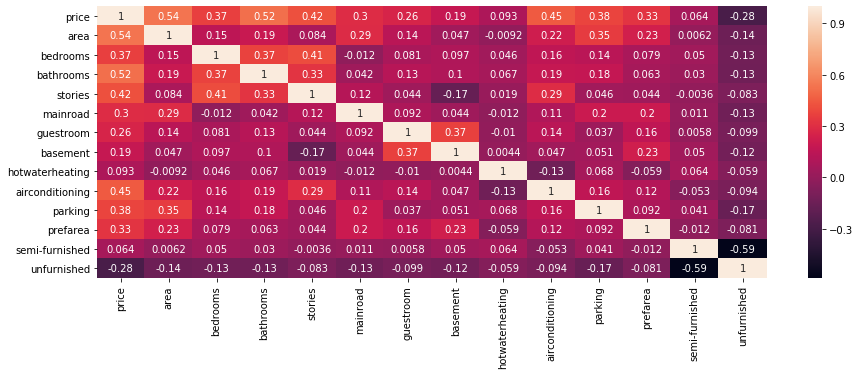

In [357]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True)

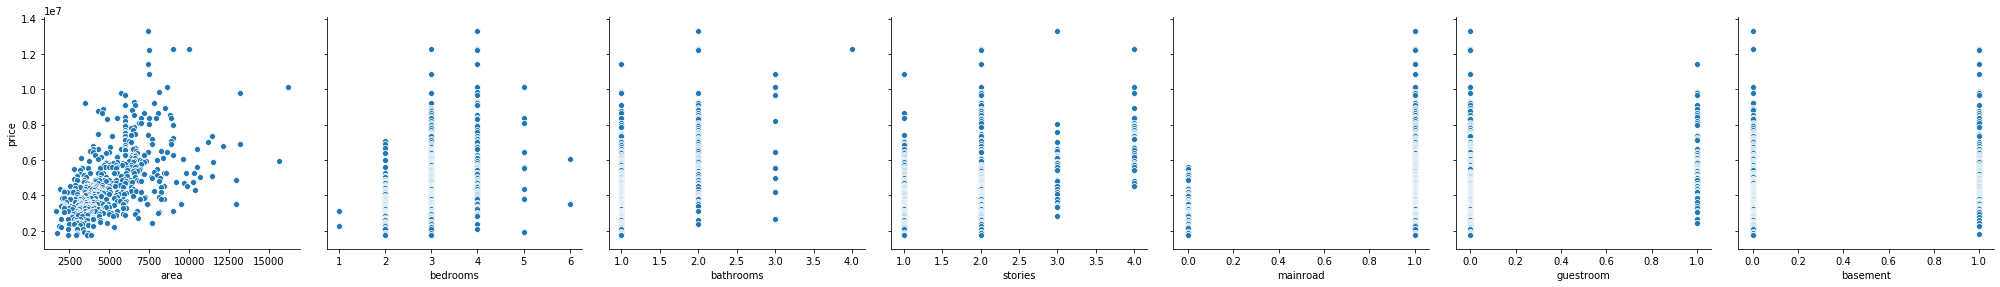

In [358]:

sns.pairplot(df1,x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement'],y_vars='price',size=4,aspect=1,kind='scatter')

In [359]:
X=df1.drop(['price'],axis=1)
y=df1['price']

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [362]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
227,6000,2,1,1,1,0,1,0,1,1,0,0,0
319,3000,4,1,3,1,0,1,0,1,2,0,1,0
367,3630,2,1,1,1,0,0,0,1,0,0,0,1
515,3210,3,1,2,1,0,1,0,0,0,0,0,1
143,4800,5,2,3,0,0,1,1,0,0,0,0,1


In [363]:
X_train.shape

(381, 13)

### RFE

In [364]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [365]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [366]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [367]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  ###feed data frame


[('area', False, 4),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', True, 1)]

In [368]:
X=X.drop(['area','bedrooms','semi-furnished'],axis=1)


In [369]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [370]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [371]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [372]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  ###feed data frame


[('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('unfurnished', True, 1)]

#### scaling

In [373]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [374]:
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0
1,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0
2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0
3,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0
4,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0


In [375]:
X_train.shape

(381, 10)

### RFE

In [376]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression


In [377]:
# lm=LinearRegression()
# lm.fit(X_train,y_train)

In [378]:
# rfe=RFE(lm,10)
# rfe=rfe.fit(X_train,y_train)

In [379]:
# list(zip(X_train_df.columns,rfe.support_,rfe.ranking_))  ###feed data frame
#

In [380]:
import statsmodels.api as sm

In [381]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
y_train=list(y_train)
lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
lr

In [382]:
X_train_sm

,const,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0
1,1.0,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0
2,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0
3,1.0,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0
4,1.0,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0
5,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0
6,1.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
7,1.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
8,1.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,1.0,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0


In [383]:
X_train_sm.shape

(381, 11)

In [384]:
lr.params

const              2.567663e+06
bathrooms          3.407135e+06
stories            1.395432e+06
mainroad           6.746269e+05
guestroom          2.367032e+05
basement           3.457863e+05
hotwaterheating    1.007981e+06
airconditioning    1.001821e+06
parking            1.388819e+06
prefarea           8.836318e+05
unfurnished       -4.670864e+05
dtype: float64

In [385]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     62.74
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.74e-73
Time:                        17:27:37   Log-Likelihood:                -5858.6
No. Observations:                 381   AIC:                         1.174e+04
Df Residuals:                     370   BIC:                         1.178e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.568e+06   1.82e+05     

In [386]:
X_train

,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0
1,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0
2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0
3,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0
4,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0
5,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0
6,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
7,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
8,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0


In [387]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [388]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,mainroad,3.44
1,stories,2.34
4,basement,1.90
7,parking,1.82
6,airconditioning,1.75
0,bathrooms,1.65
3,guestroom,1.52
8,prefarea,1.44
9,unfurnished,1.33
5,hotwaterheating,1.12


In [389]:
X=X.drop(['guestroom'],axis=1)

In [390]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [391]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
y_train=list(y_train)
lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
lr

In [392]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     69.35
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.98e-74
Time:                        17:27:37   Log-Likelihood:                -5859.6
No. Observations:                 381   AIC:                         1.174e+04
Df Residuals:                     371   BIC:                         1.178e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.313e+05   2.42e+05     

In [393]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,bathrooms,7.06
1,stories,6.22
2,mainroad,5.04
6,parking,1.81
5,airconditioning,1.73
3,basement,1.71
7,prefarea,1.44
8,unfurnished,1.39
4,hotwaterheating,1.12


In [394]:
X=X.drop(['bathrooms'],axis=1)

In [395]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [396]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
y_train=list(y_train)
lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
lr

In [397]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     56.77
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           6.63e-60
Time:                        17:27:38   Log-Likelihood:                -5895.5
No. Observations:                 381   AIC:                         1.181e+04
Df Residuals:                     372   BIC:                         1.184e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.957e+06   2.33e+05     

In [398]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,mainroad,4.72
0,stories,4.17
5,parking,1.74
4,airconditioning,1.72
2,basement,1.58
6,prefarea,1.44
7,unfurnished,1.36
3,hotwaterheating,1.11


# FOR TEST DATA 

### pre

In [399]:
X_test.columns

Index(['stories', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'unfurnished'],
      dtype='object')

## donot remove features while testing and donot  do OLS model directly fit linear model and predict and do r2

In [400]:
# X=df1[['stories', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning',
#        'parking', 'prefarea', 'unfurnished']]

In [401]:
# X_test=sc.transform(X_test)
# X_test=pd.DataFrame(X_test,columns=X.columns)
# X_test.head()

In [402]:
# import statsmodels.api as sm
# X_test_sm=sm.add_constant(X_test)
# y_test=list(y_test)
# lr=sm.OLS(y_test,X_test_sm).fit()### feed list as input
# lr

In [403]:
# lr.params

In [404]:
# print(lr.summary())

In [405]:
# # create DF that vll contain all features variables and thier respective VIF
# vif=pd.DataFrame()
# vif['Features']=X_test.columns
# vif['VIF']=[variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]## shape(1) ---> for all coloumn
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [406]:
#print the intercept(constant C)
# print(lm.intercept_)

In [407]:
# lm.coef_ ### these r the coefficients(B1,B2)

In [408]:
# y_pred_train=lm.predict(X_train)   #check/predect for train data output 

In [409]:
# y_pred=lm.predict(X_test)

In [410]:
# X=X.drop(['unfurnished'],axis=1)

In [411]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [412]:
# import statsmodels.api as sm
# X_test_sm=sm.add_constant(X_test)
# y_test=list(y_test)
# lr=sm.OLS(y_test,X_test_sm).fit()### feed list as input
# lr

In [413]:
# import statsmodels.api as sm
# X_train_sm=sm.add_constant(X_train)
# y_train=list(y_train)
# lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
# lr

In [414]:
# print(lr.summary())

In [415]:
# # create DF that vll contain all features variables and thier respective VIF
# vif=pd.DataFrame()
# vif['Features']=X_test.columns
# vif['VIF']=[variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]## shape(1) ---> for all coloumn
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [416]:
# # create DF that vll contain all features variables and thier respective VIF
# vif=pd.DataFrame()
# vif['Features']=X_test.columns
# vif['VIF']=[variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]## shape(1) ---> for all coloumn
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [417]:
# X=X.drop(['mainroad'],axis=1)

In [418]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [419]:
# import statsmodels.api as sm
# X_test_sm=sm.add_constant(X_test)
# y_test=list(y_test)
# lr=sm.OLS(y_test,X_test_sm).fit()### feed list as input
# lr

In [420]:
# print(lr.summary())

In [421]:
# # create DF that vll contain all features variables and thier respective VIF
# vif=pd.DataFrame()
# vif['Features']=X_test.columns
# vif['VIF']=[variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]## shape(1) ---> for all coloumn
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [422]:
# X=X.drop(['hotwaterheating'],axis=1)

In [423]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [424]:
# import statsmodels.api as sm
# X_test_sm=sm.add_constant(X_test)
# y_test=list(y_test)
# lr=sm.OLS(y_test,X_test_sm).fit()### feed list as input
# lr

In [425]:
# print(lr.summary())

In [426]:
# # create DF that vll contain all features variables and thier respective VIF
# vif=pd.DataFrame()
# vif['Features']=X_test.columns
# vif['VIF']=[variance_inflation_factor(X_test.values,i) for i in range(X_test.shape[1])]## shape(1) ---> for all coloumn
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [427]:
from sklearn.linear_model import LinearRegression

In [428]:
lm=LinearRegression()

In [429]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [430]:
y_pred=lm.predict(X_test)

In [431]:
from sklearn import metrics

In [432]:
metrics.r2_score(y_test,y_pred)#91% data is correct

0.473939528150951

In [433]:
y_pred_train=lm.predict(X_train)#check/predect for train data output 

In [434]:
len(y_pred)

164

In [435]:
len(y_test)

164

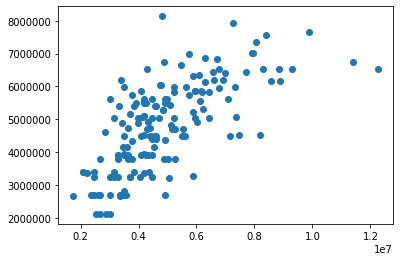

In [436]:
plt.scatter(y_test,y_pred)

In [437]:
metrics.r2_score(y_train,y_pred_train)

0.549702763345006

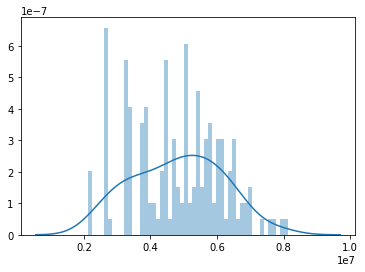

In [438]:
sns.distplot((y_pred),bins=50)

In [439]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 977405.7793015474
MSE 1716595631549.445
RMSE 1310189.1586902423


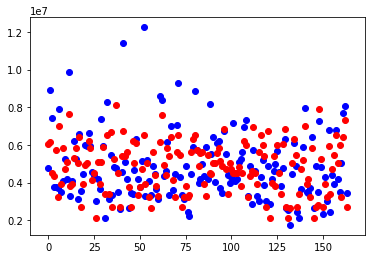

In [442]:
plt.scatter(range(len(y_test)),y_test,color='b')
plt.scatter(range(len(y_pred)),y_pred,color='r')